In [1]:
## Import Libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
## Upload the data 

In [3]:
df = pd.read_csv('movies.csv')

In [4]:
## Explore the data 

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Missing values in columns: 
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
## Percentage of missing values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())    
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
## Data Types:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
## Deleting null values: 
df_new= df.dropna()

In [12]:
#### We notice that the data type of budget,gross,votes,runtime is float64, but the number after the comma is zero
#### to get rid of that, we change the datatype to integer, this nethod wouldn't be ahieved if there are still null values
df_new[['budget','gross','runtime','votes']]=  df_new[['budget','gross','runtime','votes']].astype('int64')
df_new[['budget','gross','runtime','votes']]

,budget,gross,runtime,votes
0,19000000,46998772,146,927000
1,4500000,58853106,104,65000
2,18000000,538375067,124,1200000
3,3500000,83453539,88,221000
4,6000000,39846344,98,108000
...,...,...,...,...
7648,90000000,426505244,124,140000
7649,85000000,319715683,99,102000
7650,175000000,245487753,101,53000
7651,135000000,111105497,100,42000


In [13]:
## Sort the rows by descendign order of gross: 
df.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [14]:
## Extract Distint Values 
# If we want to know the names of companies in our dataframe, so I want the distinct values only, 
# I want to see the name of each company only one time: 
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [16]:
## Drop Any Duplicates 
df.drop_duplicates 

<bound method DataFrame.drop_duplicates of                                                 name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020 

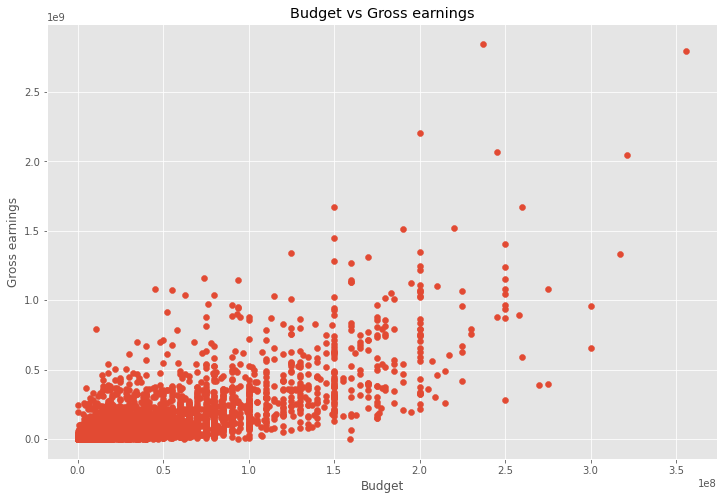

In [17]:
##Correlation between 'gross' & 'budget'
## Correlation Scatter PLot 
# To get the correlation, we build a scatter plot: 

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

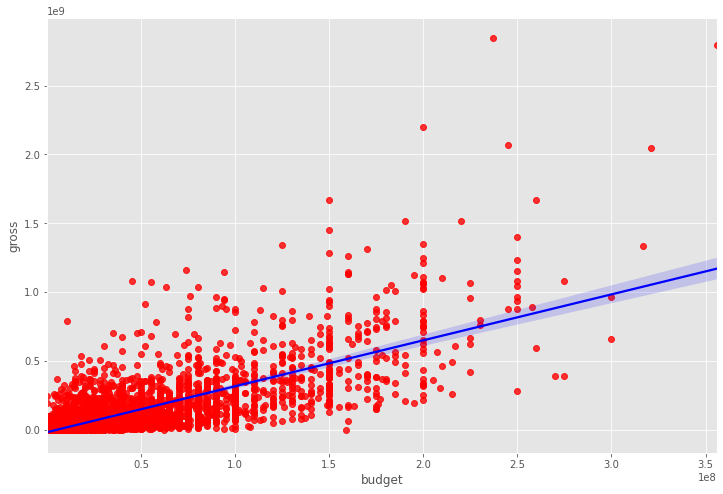

In [19]:
##Correlation Regression Plot 
# from the above graph, it seems that they are positively correlated, but we should have a regression plot to tell:
# Regreesion plot is done by seaborn library
sns.regplot(x='budget',y='gross',data=df,scatter_kws= {"color":"red"},line_kws={"color":"blue"})

# From the below results, we notice from the line ( going-up line) that the correlation is positive.

In [20]:
# We knew that bufget and gross are positively correlated, but how much are they correlated: 
# The following shows the correlation between all the columns, not just budget and gross
df_correlation = df.corr()
df_correlation
# We have three methods for correlation: pearson, kendall, spearman, by default is is pearson, they are 
# similar but differs a little, if I want to choose a specific method: df.corr(method='kendall')...

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


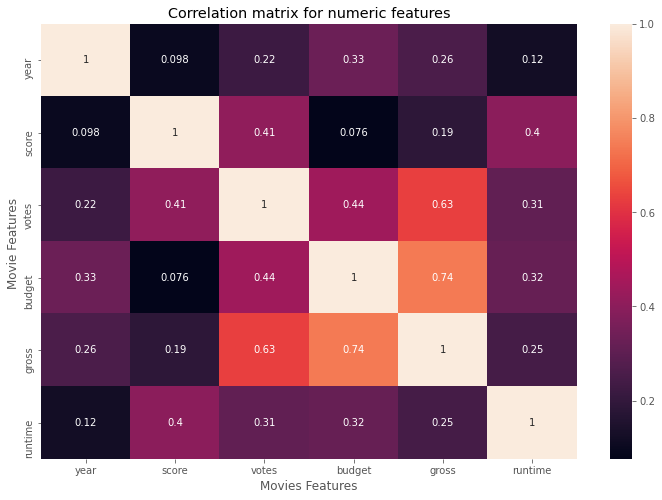

In [21]:
## Correlation MAtrix 
sns.heatmap(df_correlation, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movie Features ')
plt.show()

In [22]:
correlation_pairs = df.corr().unstack()
correlation_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.329321
         gross      0.257486
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.076254
         gross      0.186258
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.442429
         gross      0.630757
         runtime    0.309212
budget   year       0.329321
         score      0.076254
         votes      0.442429
         budget     1.000000
         gross      0.740395
         runtime    0.320447
gross    year       0.257486
         score      0.186258
         votes      0.630757
         budget     0.740395
         gross      1.000000
         runtime    0.245216
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.320447
         gross

In [23]:
correlation_pairs = df.corr().unstack()
correlation_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.329321
         gross      0.257486
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.076254
         gross      0.186258
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.442429
         gross      0.630757
         runtime    0.309212
budget   year       0.329321
         score      0.076254
         votes      0.442429
         budget     1.000000
         gross      0.740395
         runtime    0.320447
gross    year       0.257486
         score      0.186258
         votes      0.630757
         budget     0.740395
         gross      1.000000
         runtime    0.245216
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.320447
         gross

In [24]:
correlation_pairs = df.corr().unstack()
correlation_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.329321
         gross      0.257486
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.076254
         gross      0.186258
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.442429
         gross      0.630757
         runtime    0.309212
budget   year       0.329321
         score      0.076254
         votes      0.442429
         budget     1.000000
         gross      0.740395
         runtime    0.320447
gross    year       0.257486
         score      0.186258
         votes      0.630757
         budget     0.740395
         gross      1.000000
         runtime    0.245216
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.320447
         gross

In [25]:
##Correlation, Numeric presentation of strings
# We have columns that are not numeric but we want to see the correlation between them 
#and other numeric columns so we transform all non-numeric columns to numeric columns:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [26]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [ ]:
sns.heatmap(df_numerized, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movie Features ')
plt.show()